# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("ALPACAKEY.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

response_data_btc = requests.get(btc_url)
print(f"BTC: {response_data_btc}")
info_btc = response_data_btc.json()
btc_price = info_btc['data']['1']['quotes']['CAD']['price']
print(f"Current BTC price is {btc_price}")

# Fetch current ETH price

response_data_eth = requests.get(eth_url)
print(f"ETH: {response_data_eth}")
info_eth = response_data_eth.json()
eth_price = info_eth['data']['1027']['quotes']['CAD']['price']
print(f"Current ETH price is {eth_price}")

# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

BTC: <Response [200]>
Current BTC price is 22893.68653
ETH: <Response [200]>
Current ETH price is 1694.687995
The current value of your 1.2 BTC is $27472.42
The current value of your 5.3 ETH is $8981.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

api_key = os.getenv("ALPACA_API_KEY")
api_key_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

type(api_key)

###PLEASE NOTE THAT THERE IS CURRENTLY NO ACCESS TO ALPACA YAHOO FINANCE WILL BE USED INSTEAD.

str

In [8]:
import yfinance as yf

In [9]:
# Format current date as ISO format

today = pd.Timestamp("2023-01-03", tz="America/New_York").isoformat()

# Set the tickers

ticker_1 = yf.Ticker('SPY').info
ticker_2 = yf.Ticker('AGG').info

# Set timeframe to "1Day" for Alpaca API

timeframe = "1Day"

# Get current closing prices for SPY and AGG

##Since YFINANCE USED, PLEASE SEE FURTHER BELOW FOR PREVIOUS CLOSING PRICES.



In [10]:
# Reorganize the DataFrame
# Separate ticker data

## DATA LOADED THROUGH YFINANCE INSTEAD OF ALPACA AND IS REORGANIZED SLIGHTLY DIFFERENTLY BELOW:


import yfinance as yf
from datetime import date, timedelta
import pandas as pd
Start = date.today() - timedelta(365*5)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

def closing_price(ticker):
    Asset = pd.DataFrame(yf.Ticker(ticker, start=Start,
      end=End)['Adj Close'])     
    return Asset

In [11]:
def ticker_data(ticker):
    Asset =  pd.DataFrame(yf.Ticker(ticker).history(start=Start,end=End))
    return Asset

In [12]:
df_AGG = ticker_data("AGG")
df_SPY = ticker_data("SPY")

In [13]:
df_AGG.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-05 00:00:00-05:00,96.894059,96.894059,96.716512,96.796410,4322900,0.0,0
2018-01-08 00:00:00-05:00,96.858523,96.858523,96.716485,96.769753,3394500,0.0,0
2018-01-09 00:00:00-05:00,96.681018,96.681018,96.485720,96.503471,2301300,0.0,0
2018-01-10 00:00:00-05:00,96.299301,96.512350,96.254912,96.503471,4194300,0.0,0
2018-01-11 00:00:00-05:00,96.459066,96.636606,96.414678,96.547836,3470400,0.0,0


In [14]:
df_SPY.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-05 00:00:00-05:00,250.200476,251.164504,249.686323,251.035980,83524000,0.0,0
2018-01-08 00:00:00-05:00,250.935026,251.660359,250.632054,251.495102,57319200,0.0,0
2018-01-09 00:00:00-05:00,251.935718,252.716137,251.641909,252.064270,57254000,0.0,0
2018-01-10 00:00:00-05:00,251.274623,251.954061,250.576861,251.678604,69574300,0.0,0
2018-01-11 00:00:00-05:00,252.257085,253.514923,252.082638,253.514923,62361500,0.0,0


In [15]:
df_SPY.rename(columns = {'Open':'open', 'High':'high',
                              'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [16]:
df_AGG.rename(columns = {'Open':'open', 'High':'high',
                              'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

In [17]:
# Concatenate the ticker DataFrames

df_ticker_concatenated = pd.concat([df_AGG, df_SPY], axis=1, keys=["AGG", "SPY"])

In [18]:
# Preview DataFrame

df_ticker_concatenated.tail()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2022-12-27 00:00:00-05:00  97.459999  97.620003  97.209999  97.260002   
2022-12-28 00:00:00-05:00  97.470001  97.500000  97.080002  97.089996   
2022-12-29 00:00:00-05:00  97.209999  97.470001  97.180000  97.449997   
2022-12-30 00:00:00-05:00  97.250000  97.360001  96.970001  96.989998   
2023-01-03 00:00:00-05:00  97.970001  97.970001  97.370003  97.559998   

                                                                   SPY  \
                             volume Dividends Stock Splits        open   
Date                                                                     
2022-12-27 00:00:00-05:00   7925700       0.0            0  382.790009   
2022-12-28 00:00:00-05:00  12131200       0.0            0  381.329987   
2022-12-29 00:00:00-05:00   7763300       0.0            0  379.630005   
2022-12-30 00:00:00-05:00   8469000       0.0            0  380.640015   
2023-01-03 00:00:00-05:00  19930800       0.0            0  384.369995   

                                                                         \
                                 high         low       close    volume   
Date                                                                      
2022-12-27 00:00:00-05:00  383.149994  379.649994  381.399994  51638200   
2022-12-28 00:00:00-05:00  383.390015  376.420013  376.660004  70911500   
2022-12-29 00:00:00-05:00  384.350006  379.079987  383.440002  66970900   
2022-12-30 00:00:00-05:00  382.579987  378.429993  382.429993  83975100   
2023-01-03 00:00:00-05:00  386.429993  377.829987  380.820007  74681600   

                                                  
                          Dividends Stock Splits  
Date                                              
2022-12-27 00:00:00-05:00       0.0            0  
2022-12-28 00:00:00-05:00       0.0            0  
2022-12-29 00:00:00-05:00       0.0            0  
2022-12-30 00:00:00-05:00       0.0            0  
2023-01-03 00:00:00-05:00       0.0            0

In [19]:
# Pick AGG and SPY close prices

agg_close_price = df_ticker_concatenated["AGG"]["close"][-1]
spy_close_price = df_ticker_concatenated["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.55999755859375
Current SPY closing price: $380.82000732421875


In [20]:
# Compute the current value of shares

my_spy_value = my_spy * agg_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $4878.00
The current value of your 200 AGG shares is $76164.00


### Savings Health Analysis

In [21]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

consolidated_crypto = my_btc_value + my_eth_value
consolidated_shares = my_spy_value + my_agg_value
print(consolidated_crypto)
print(consolidated_shares)

print("------------------------------------")

# Create savings DataFrame

df_savings = pd.DataFrame(({'amount': [consolidated_crypto, consolidated_shares]}), index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

36454.2702095
81042.00134277344
------------------------------------


,amount
crypto,36454.270209
shares,81042.001343


array([<AxesSubplot:ylabel='amount'>], dtype=object)

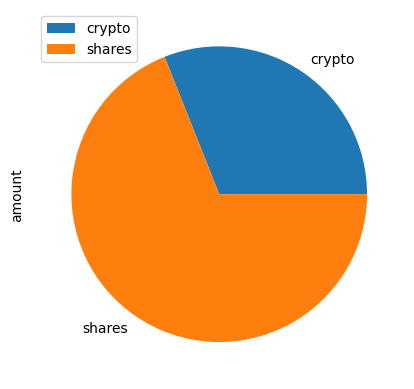

In [22]:
# Plot savings pie chart

df_savings.plot(kind='pie', subplots = True)

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = consolidated_crypto + consolidated_shares
print(f"Total Savings: {total_savings}")

print("------------------------------------")


# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations - You have enough money in this fund for a rainy day!")
if total_savings == emergency_fund:
    print("Well Done - You've reached your desired savings goal!")
if total_savings < emergency_fund:
    print(f"Keep going - you are {emergency_fund - total_savings} away from reaching your savings goal!")

Total Savings: 117496.27155227344
------------------------------------
Congratulations - You have enough money in this fund for a rainy day!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-03', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-03', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG

## THIS HAS ALRADY BEEN DONE IN THE PREVIOUS ACTIVITY

# Display sample data
df_ticker_concatenated.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2018-01-05 00:00:00-05:00  96.894059  96.894059  96.716512  96.796410   
2018-01-08 00:00:00-05:00  96.858523  96.858523  96.716485  96.769753   
2018-01-09 00:00:00-05:00  96.681018  96.681018  96.485720  96.503471   
2018-01-10 00:00:00-05:00  96.299301  96.512350  96.254912  96.503471   
2018-01-11 00:00:00-05:00  96.459066  96.636606  96.414678  96.547836   

                                                                  SPY  \
                            volume Dividends Stock Splits        open   
Date                                                                    
2018-01-05 00:00:00-05:00  4322900       0.0            0  250.200476   
2018-01-08 00:00:00-05:00  3394500       0.0            0  250.935026   
2018-01-09 00:00:00-05:00  2301300       0.0            0  251.935718   
2018-01-10 00:00:00-05:00  4194300       0.0            0  251.274623   
2018-01-11 00:00:00-05:00  3470400       0.0            0  252.257085   

                                                                         \
                                 high         low       close    volume   
Date                                                                      
2018-01-05 00:00:00-05:00  251.164504  249.686323  251.035980  83524000   
2018-01-08 00:00:00-05:00  251.660359  250.632054  251.495102  57319200   
2018-01-09 00:00:00-05:00  252.716137  251.641909  252.064270  57254000   
2018-01-10 00:00:00-05:00  251.954061  250.576861  251.678604  69574300   
2018-01-11 00:00:00-05:00  253.514923  252.082638  253.514923  62361500   

                                                  
                          Dividends Stock Splits  
Date                                              
2018-01-05 00:00:00-05:00       0.0            0  
2018-01-08 00:00:00-05:00       0.0            0  
2018-01-09 00:00:00-05:00       0.0            0  
2018-01-10 00:00:00-05:00       0.0            0  
2018-01-11 00:00:00-05:00       0.0            0

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_60_40_dist = MCSimulation(
    portfolio_data = df_ticker_concatenated,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [27]:
# Printing the simulation input data

MC_60_40_dist.portfolio_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2018-01-05 00:00:00-05:00  96.894059  96.894059  96.716512  96.796410   
2018-01-08 00:00:00-05:00  96.858523  96.858523  96.716485  96.769753   
2018-01-09 00:00:00-05:00  96.681018  96.681018  96.485720  96.503471   
2018-01-10 00:00:00-05:00  96.299301  96.512350  96.254912  96.503471   
2018-01-11 00:00:00-05:00  96.459066  96.636606  96.414678  96.547836   

                                                                        \
                            volume Dividends Stock Splits daily_return   
Date                                                                     
2018-01-05 00:00:00-05:00  4322900       0.0            0          NaN   
2018-01-08 00:00:00-05:00  3394500       0.0            0    -0.000275   
2018-01-09 00:00:00-05:00  2301300       0.0            0    -0.002752   
2018-01-10 00:00:00-05:00  4194300       0.0            0     0.000000   
2018-01-11 00:00:00-05:00  3470400       0.0            0     0.000460   

                                  SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-05 00:00:00-05:00  250.200476  251.164504  249.686323  251.035980   
2018-01-08 00:00:00-05:00  250.935026  251.660359  250.632054  251.495102   
2018-01-09 00:00:00-05:00  251.935718  252.716137  251.641909  252.064270   
2018-01-10 00:00:00-05:00  251.274623  251.954061  250.576861  251.678604   
2018-01-11 00:00:00-05:00  252.257085  253.514923  252.082638  253.514923   

                                                                         
                             volume Dividends Stock Splits daily_return  
Date                                                                     
2018-01-05 00:00:00-05:00  83524000       0.0            0          NaN  
2018-01-08 00:00:00-05:00  57319200       0.0            0     0.001829  
2018-01-09 00:00:00-05:00  57254000       0.0            0     0.002263  
2018-01-10 00:00:00-05:00  69574300       0.0            0    -0.001530  
2018-01-11 00:00:00-05:00  62361500       0.0            0     0.007296

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_60_40_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 200.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 210.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 220.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 230.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 240.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 250.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 260.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 270.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 280.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 290.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 300.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 310.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 320.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 330.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 340.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 350.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 360.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 370.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 380.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 390.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 400.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 410.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 420.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 430.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 440.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 450.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 460.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 470.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 480.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 490.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997129,0.994431,0.993020,0.998888,0.995303,0.997587,1.007809,0.992809,1.003780,1.009803,...,1.001657,0.997737,1.007484,0.996801,0.984639,1.000314,1.003088,1.013389,0.999013,1.010443
2,1.008200,0.988749,1.003246,0.996023,0.998861,0.996911,1.031743,0.997172,0.993304,0.994486,...,1.002622,0.999240,1.007959,1.004886,0.989248,1.005282,1.006616,0.998659,0.999004,1.012820
3,1.018125,0.975425,0.988321,0.996854,0.994202,1.010211,1.023617,0.984602,0.995305,0.996289,...,0.998831,0.997171,1.013142,1.019573,1.002356,0.998793,0.995991,0.993313,0.999019,1.023902
4,1.004165,0.976511,0.983523,0.993256,0.990980,1.009490,1.019659,0.996357,1.002274,1.006190,...,0.989999,0.993617,1.018752,1.023426,0.994138,0.996347,0.990471,0.979270,0.995459,1.018684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.075522,5.732511,6.791509,3.631176,1.968047,11.340491,2.761943,12.158912,10.267415,2.491132,...,10.123512,4.284881,8.455205,2.335214,2.090280,30.634435,3.688966,9.800454,9.059370,3.876940
7557,5.042970,5.685327,6.819041,3.626653,1.993110,11.381318,2.717563,12.278559,10.284860,2.479241,...,10.080308,4.299232,8.366162,2.364742,2.101724,30.424763,3.687444,9.666776,9.143739,3.910233
7558,5.123469,5.732191,6.792596,3.626730,2.003934,11.150513,2.678836,12.180164,10.267467,2.476984,...,10.138189,4.273201,8.395835,2.350178,2.085245,30.171363,3.681397,9.649942,9.060587,3.882427
7559,5.065094,5.742815,6.861389,3.612182,2.019953,11.028863,2.683446,12.252431,10.335506,2.459653,...,10.078754,4.269058,8.462125,2.353079,2.067153,30.501365,3.710228,9.710798,9.102207,3.903209


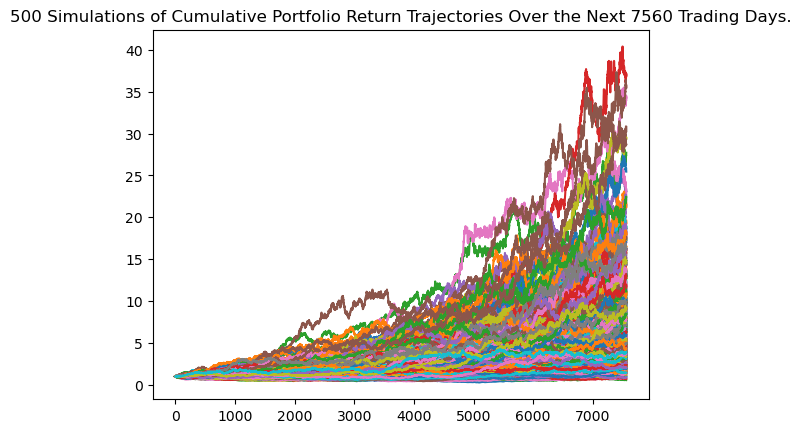

In [29]:
# Plot simulation outcomes

line_plot = MC_60_40_dist.plot_simulation()

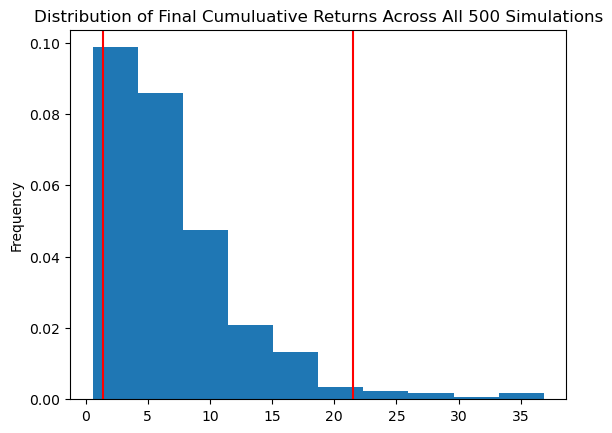

In [30]:
# Plot probability distribution and confidence intervals

dist_plot = MC_60_40_dist.plot_distribution()

### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_60_40_dist.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              7.065138
std               5.473016
min               0.577378
25%               3.371884
50%               5.326617
75%               9.145172
max              36.848895
95% CI Lower      1.420170
95% CI Upper     21.490054
Name: 7560, dtype: float64


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

portfolio_ci_lower = round(tbl[8]*initial_investment,2)
portfolio_ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $28403.39 and $429801.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

portfolio_ci_lower = round(tbl[8]*initial_investment,2)
portfolio_ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $42605.09 and $644701.62


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_75_25_dist = MCSimulation(
    portfolio_data = df_ticker_concatenated,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_75_25_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 200.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 210.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 220.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 230.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 240.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 250.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 260.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 270.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 280.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 290.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 300.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 310.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 320.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 330.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 340.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 350.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 360.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 370.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 380.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 390.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 400.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 410.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 420.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 430.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 440.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 450.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 460.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 470.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 480.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 490.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995971,1.010565,1.005908,1.009542,0.997887,0.998326,0.992730,1.007555,0.996633,1.015064,...,0.985231,1.019262,0.996948,1.014293,0.992637,0.988601,1.011264,0.995791,0.993659,0.993762
2,0.989114,1.007683,1.014169,1.007089,0.974009,1.018134,0.994178,0.996075,1.002587,1.015666,...,0.972205,1.015047,0.997049,1.019529,0.990454,1.003794,1.002168,1.010496,0.988377,0.982905
3,0.980756,1.007073,1.015796,1.004754,0.970745,1.022737,0.980918,0.994993,1.018471,1.015962,...,0.960591,1.025487,1.008608,1.023733,0.982241,1.029921,0.997349,1.001824,0.994393,0.991872
4,0.981127,0.999535,1.025232,0.999842,0.963593,1.027222,0.969881,1.007042,1.017434,1.013831,...,0.952083,1.016669,1.005800,1.013651,0.984398,1.039174,0.997398,1.005589,1.011757,0.994637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.670406,1.926529,1.630953,1.225430,2.344422,1.539713,2.518845,0.974673,1.260136,1.101399,...,1.383910,1.041328,1.364374,0.954208,2.322430,2.115069,1.802486,2.493109,2.044791,1.252626
1257,2.699312,1.918032,1.604677,1.225442,2.326632,1.550073,2.514778,0.991846,1.273985,1.072703,...,1.403395,1.043050,1.383412,0.957939,2.321036,2.121061,1.783979,2.469477,2.054661,1.233215
1258,2.684694,1.924337,1.617096,1.228756,2.353056,1.569561,2.508503,1.016080,1.269231,1.065803,...,1.398033,1.032934,1.376044,0.965470,2.332991,2.132460,1.757156,2.519477,2.026081,1.231175
1259,2.651778,1.921563,1.595338,1.251978,2.384063,1.564995,2.494097,1.004854,1.260923,1.058048,...,1.414850,1.032042,1.384994,0.967259,2.329992,2.110930,1.772126,2.526498,2.012202,1.229354


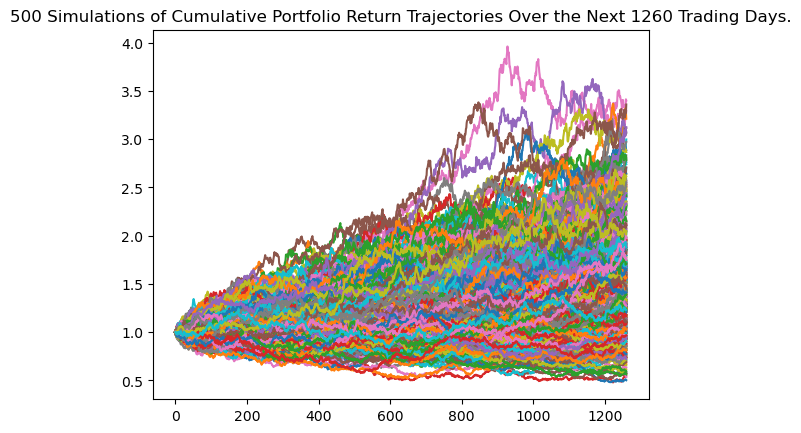

In [36]:
# Plot simulation outcomes

line_plot_5 = MC_75_25_dist.plot_simulation()

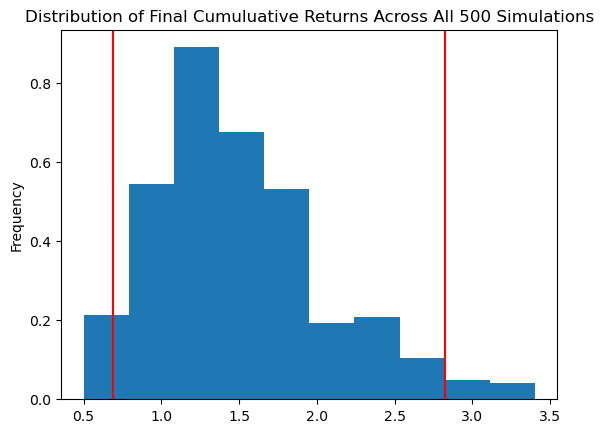

In [37]:
# Plot probability distribution and confidence intervals

dist_plot_5 = MC_75_25_dist.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_5 = MC_75_25_dist.summarize_cumulative_return()

# Print summary statistics

print(tbl_5)

count           500.000000
mean              1.502617
std               0.549932
min               0.501836
25%               1.121814
50%               1.405301
75%               1.770742
max               3.401221
95% CI Lower      0.689757
95% CI Upper      2.821456
Name: 1260, dtype: float64


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [39]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

portfolio_ci_lower_5 = round(tbl[8]*initial_investment,2)
portfolio_ci_upper_5 = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portfolio_ci_lower_5} and ${portfolio_ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $85210.17 and $1289403.24


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_75_25_dist_10 = MCSimulation(
    portfolio_data = df_ticker_concatenated,
    weights = [.25,.75],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_75_25_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 110.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 120.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 130.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 140.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 150.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 160.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 170.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 180.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 190.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 200.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 210.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 220.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 230.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 240.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 250.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 260.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 270.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 280.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 290.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 300.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 310.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 320.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 330.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 340.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 350.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 360.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 370.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 380.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 390.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 400.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 410.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 420.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 430.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 440.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 450.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 460.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 470.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 480.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

Running Monte Carlo simulation number 490.


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:117:

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013234,1.002387,0.994164,1.014024,0.984658,1.011723,1.018944,1.021779,0.981097,1.012635,...,0.992767,0.990300,0.987260,0.997871,1.009281,1.009784,1.015807,1.018320,0.985207,1.002266
2,1.003737,1.007935,0.996415,1.009217,1.000811,1.021360,1.022871,1.024195,0.987639,1.022777,...,1.006257,0.984915,0.969972,0.998067,1.011439,1.009918,1.013174,1.009714,0.986330,0.993336
3,1.011639,1.008743,0.982905,1.024657,0.999964,1.040733,1.032163,1.016968,0.985858,1.010924,...,1.009601,0.987145,0.974161,1.008913,1.007093,1.025127,1.008657,0.996869,0.994236,1.013371
4,1.015002,1.001723,0.956607,1.015260,0.996963,1.044113,1.030430,1.012401,0.976068,1.024867,...,0.995295,0.975004,0.980601,1.016219,1.022316,1.027776,1.007660,1.003842,0.997509,1.015893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.991099,1.963985,1.113130,1.547049,3.310027,5.762798,2.478385,1.319935,1.724343,0.676440,...,2.557506,2.161750,2.128924,1.921763,3.127753,1.509735,5.051196,1.863836,1.542147,1.281766
2517,1.982931,1.964963,1.110876,1.551342,3.314328,5.679060,2.413527,1.320837,1.734413,0.667581,...,2.610799,2.160328,2.142413,1.927010,3.135306,1.529020,5.148989,1.833210,1.557202,1.257290
2518,2.005585,1.986735,1.127261,1.566870,3.380591,5.687136,2.395515,1.316476,1.710469,0.668415,...,2.631307,2.148098,2.171792,1.941338,3.138824,1.527475,5.096035,1.824239,1.553232,1.242313
2519,2.020634,1.977581,1.132712,1.584907,3.359469,5.622625,2.356113,1.315833,1.668842,0.662745,...,2.617368,2.121008,2.176971,1.933221,3.137368,1.540531,5.069026,1.831405,1.577182,1.243244


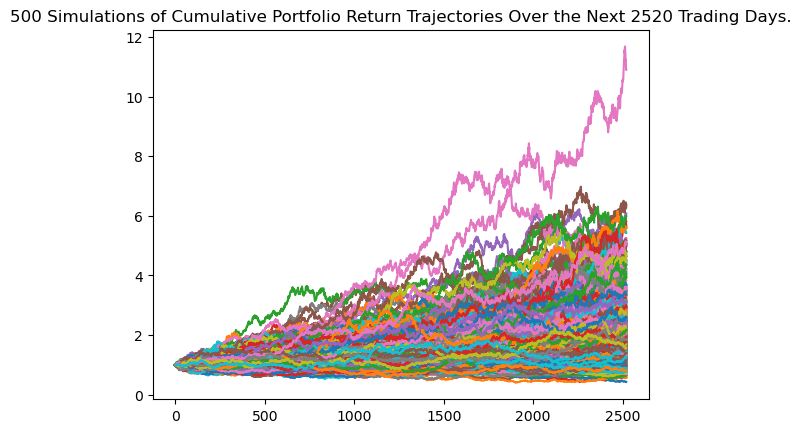

In [42]:
# Plot simulation outcomes

line_plot_10 = MC_75_25_dist_10.plot_simulation()


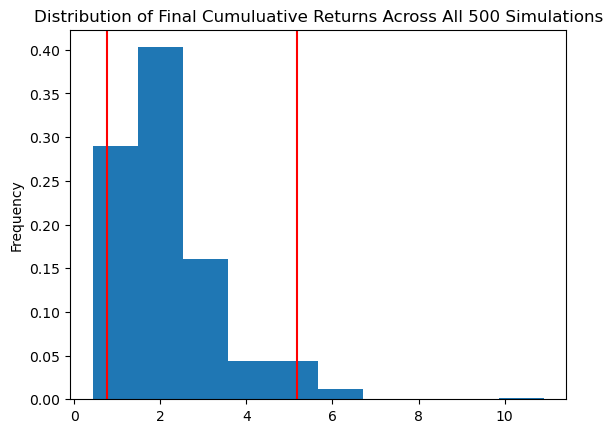

In [43]:
# Plot probability distribution and confidence intervals

dist_plot_10 = MC_75_25_dist_10.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_10 = MC_75_25_dist_10.summarize_cumulative_return()

# Print summary statistics

print(tbl_10)

count           500.000000
mean              2.187943
std               1.190211
min               0.432838
25%               1.378932
50%               1.912026
75%               2.602312
max              10.908858
95% CI Lower      0.761905
95% CI Upper      5.173640
Name: 2520, dtype: float64


C:\Users\megaf\FINTECH\UTOR-VIRT-FIN-PT-11-2022-U-LOLC\05-APIs\Unit 5 Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [45]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

portfolio_ci_lower_10 = round(tbl[8]*initial_investment,2)
portfolio_ci_upper_10 = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_ci_lower_10} and ${portfolio_ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $85210.17 and $1289403.24


In [46]:
## THE ABOVE 2 SIMULATIONS DEMONSTRATE AN OUTCOME OF A 75% STOCKS AND 25% BONDS OVER 5 AND 10 YEARS TO HELP MAKE A DECISION FOR AN EARLIER RETIREMENT.